# *Churn Prédection avec machine learning*

## **1. Exploration et Prétraitement des données :**

In [12]:
# Imporation des bibliothèques
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Chargement des données
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv').set_index('customerID')
# Affichage des 10 premières lignes du DataFrame
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [13]:
# Afficher les colonnes du DataFrame
print(data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [14]:
# Voir les informations sur le DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

- `Interprétation :`
    - D'ici en peut conclure qu'on a pas des valeur manquantes dans notre dataset mais en doit véfier cela et voir et ce qu'il ya des duplication au non 
    - On peut voir aussi la variable **TotalCharge** avec type object en doit changer sont type en float

In [15]:
# Vérifier les valeurs manquantes
print(f'Nombre de valeurs manquantes : {data.isnull().sum().sum()}')
# Vérifier les valeurs dupliquées
print(f'Nombre de valeurs dupliquées : {data.duplicated().sum()}') 

Nombre de valeurs manquantes : 0
Nombre de valeurs dupliquées : 22


In [17]:
# Suppression des colonnes inutiles et des doublons
df = data.reset_index().copy()
df.drop(columns=['customerID'], inplace=True)
df.drop_duplicates(inplace=True)
# Vérification des valeurs manquantes après nettoyage  
print(f'Nombre de valeurs manquantes après nettoyage : {df.isnull().sum().sum()}')
# Vérification des valeurs dupliquées après nettoyage   
print(f'Nombre de valeurs dupliquées après nettoyage : {df.duplicated().sum()}')

Nombre de valeurs manquantes après nettoyage : 0
Nombre de valeurs dupliquées après nettoyage : 0


In [33]:
# Changer le type de la colonne 'TotalCharges' en float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [34]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7010.000000
mean,0.162512,32.469449,64.851894,2290.353388
std,0.368947,24.534965,30.069001,2266.820832
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,55.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


In [35]:
df.describe(include='object').T

,count,unique,top,freq
gender,7021,2,Male,3541
Partner,7021,2,No,3619
Dependents,7021,2,No,4911
PhoneService,7021,2,Yes,6339
MultipleLines,7021,3,No,3368
InternetService,7021,3,Fiber optic,3090
OnlineSecurity,7021,3,No,3490
OnlineBackup,7021,3,No,3080
DeviceProtection,7021,3,No,3087
TechSupport,7021,3,No,3465


Churn
No     73.550776
Yes    26.449224
Name: proportion, dtype: float64


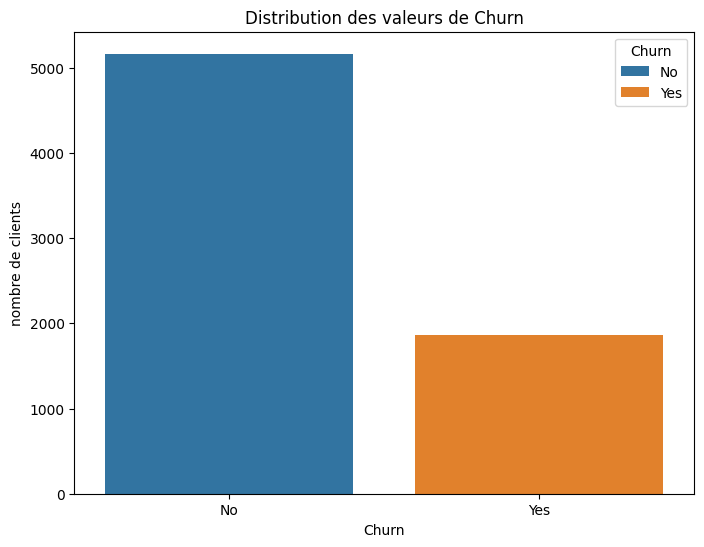

In [37]:
print(df['Churn'].value_counts(normalize=True)*100 )
# Visualisation de la distribution des valeurs de 'Churn'
plt.figure(figsize=(8, 6)) # Taille de la figure
sns.countplot(x='Churn', data=df, hue='Churn' , legend=True) # Compte des valeurs de 'Churn'
plt.title('Distribution des valeurs de Churn') # Titre du graphique
plt.xlabel('Churn') # Label de l'axe des x
plt.ylabel('nombre de clients') # Label de l'axe des y
plt.legend(title='Churn', loc='upper right') # Légende du graphique
plt.show() # Affichage de la distribution des valeurs de 'Churn'


Demographic Analysis:


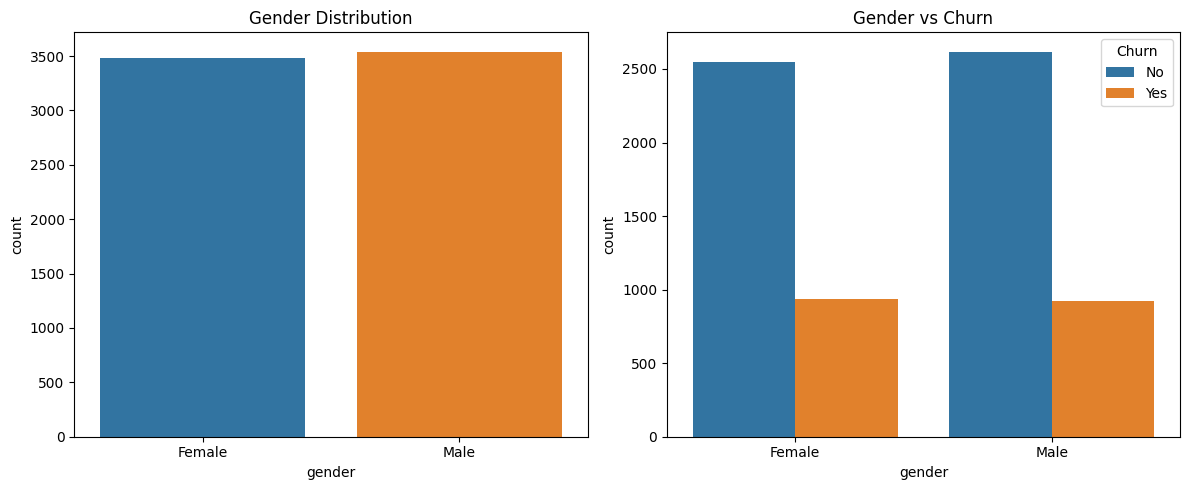

In [39]:
# Demographic Analysis
print("\nDemographic Analysis:")

# Gender and Churn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=df , hue='gender')
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Gender vs Churn')
plt.tight_layout()
plt.show()

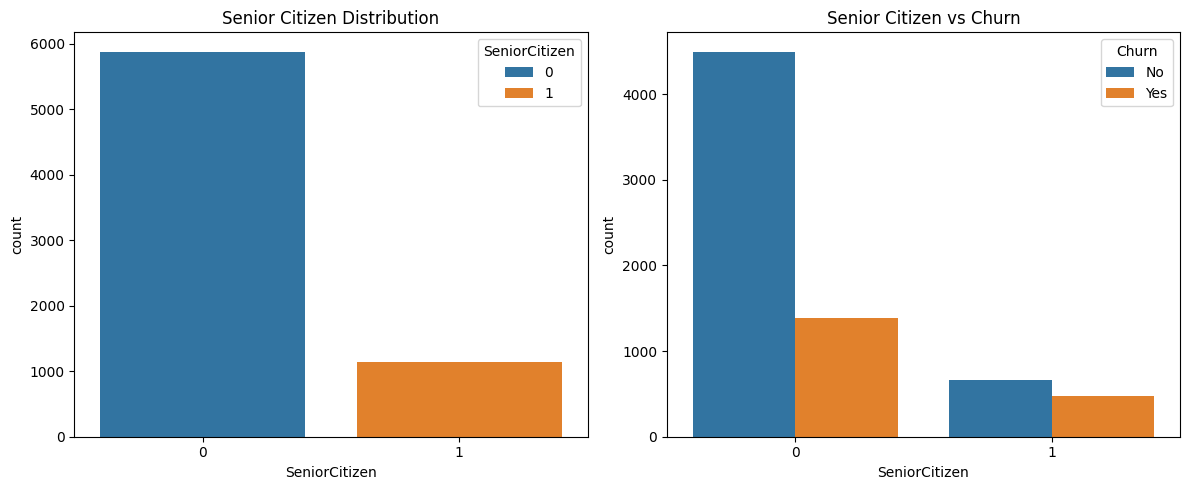

In [41]:
# Senior Citizen and Churn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='SeniorCitizen', data=df , hue='SeniorCitizen')
plt.title('Senior Citizen Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Senior Citizen vs Churn')
plt.tight_layout()
plt.show()

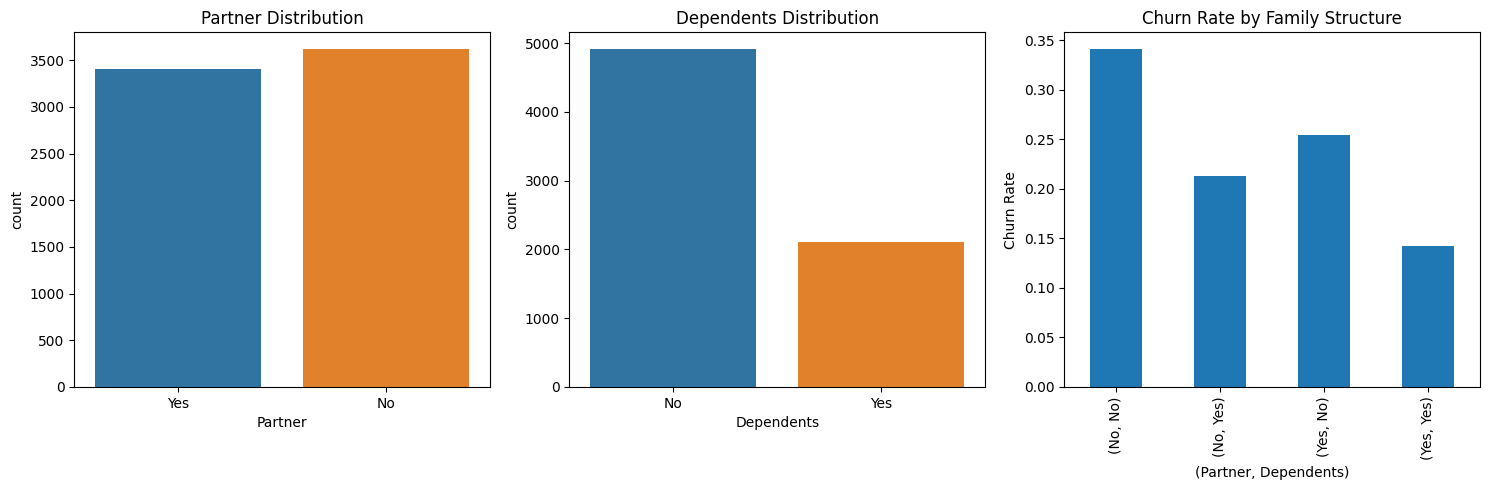

In [43]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Partner', data=df , hue='Partner')
plt.title('Partner Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='Dependents', data=df , hue='Dependents')
plt.title('Dependents Distribution')

plt.subplot(1, 3, 3)
partner_dependents = df.groupby(['Partner', 'Dependents'])['Churn'].value_counts(normalize=True).unstack()
partner_dependents['Yes'].plot(kind='bar')
plt.title('Churn Rate by Family Structure')
plt.xlabel('(Partner, Dependents)')
plt.ylabel('Churn Rate')
plt.tight_layout()
plt.show()

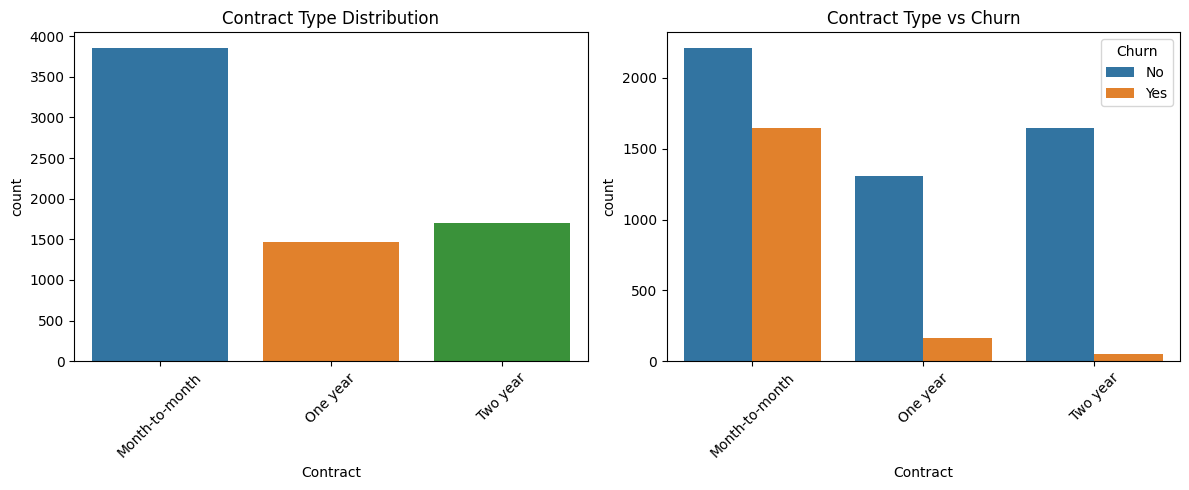

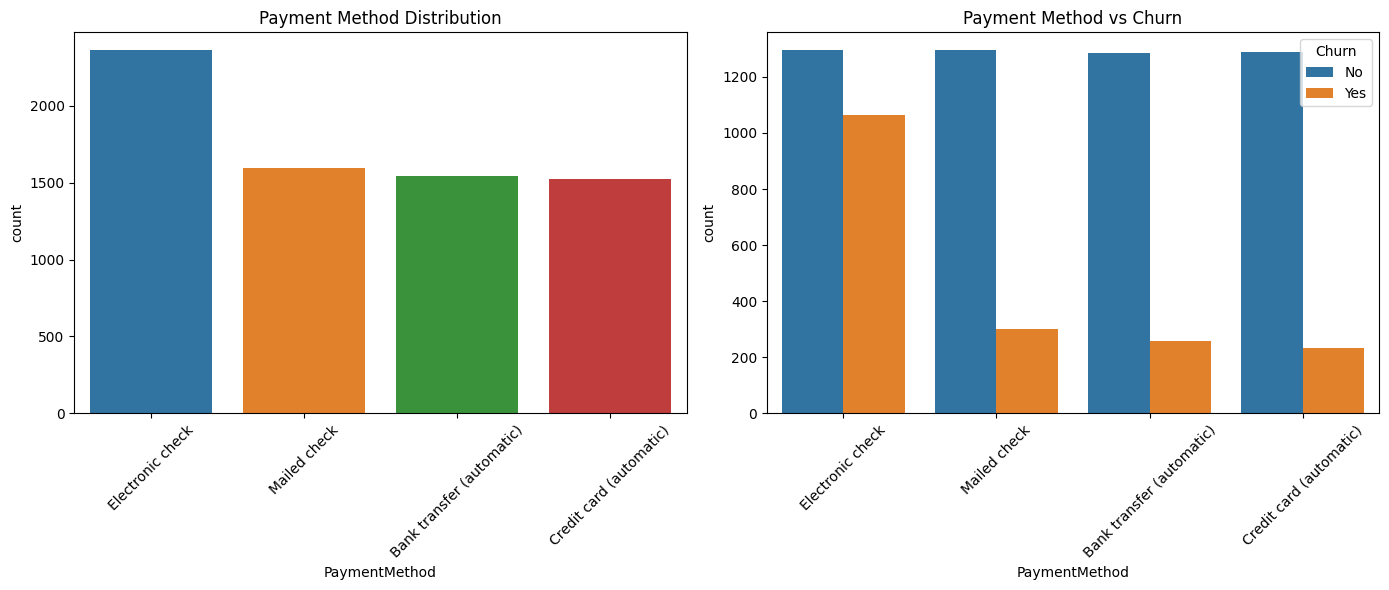

In [44]:
#Contract Type and Churn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Contract', data=df , hue='Contract')
plt.title('Contract Type Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Payment Method and Churn
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='PaymentMethod', data=df , hue='PaymentMethod')
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Payment Method vs Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
# Catégorisation de colonnes 'tenure'
def convert_to_buckets(tenure):
    if tenure <= 24:
        return '0-24 months'
    elif tenure <= 36:
        return '25-36 months'
    elif tenure <= 48:
        return '37-48 months'
    elif tenure <= 60:
        return '49-60 months'
    else:
        return '61+ months'

In [46]:
df['tenure'] = df['tenure'].apply(convert_to_buckets) # Appliquer la fonction de conversion à la colonne 'tenure'
df['tenure'].value_counts() # Afficher la distribution des valeurs de 'tenure'

tenure
0-24 months     3188
61+ months      1407
25-36 months     832
49-60 months     832
37-48 months     762
Name: count, dtype: int64

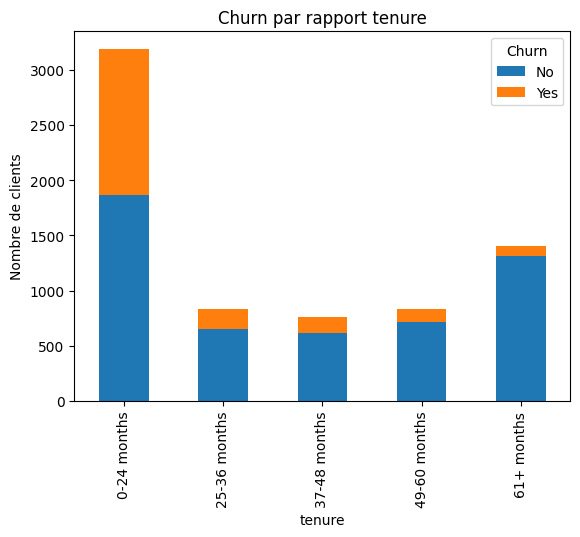

In [49]:
# Afficher la distribution des valeurs de 'tenure' par rapport à 'Churn'
df.groupby(['tenure','Churn']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Churn par rapport tenure')
plt.xlabel('tenure')
plt.ylabel('Nombre de clients')
plt.show()

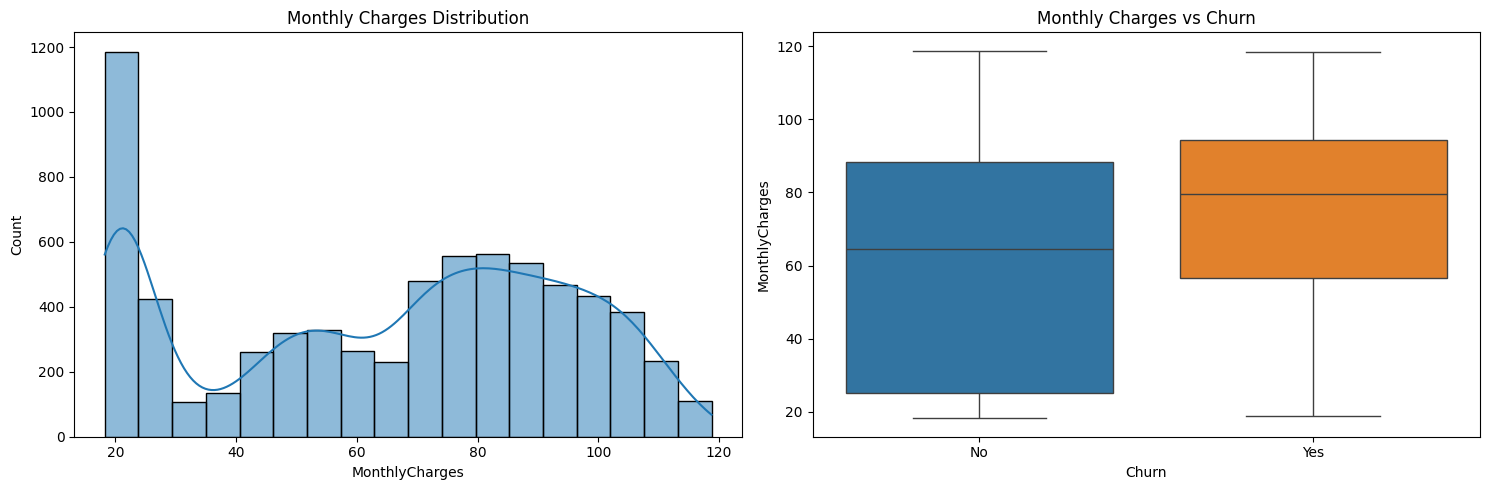

In [51]:
# Monthly Charges Distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Monthly Charges Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df , hue='Churn')
plt.title('Monthly Charges vs Churn')

plt.tight_layout()
plt.show()

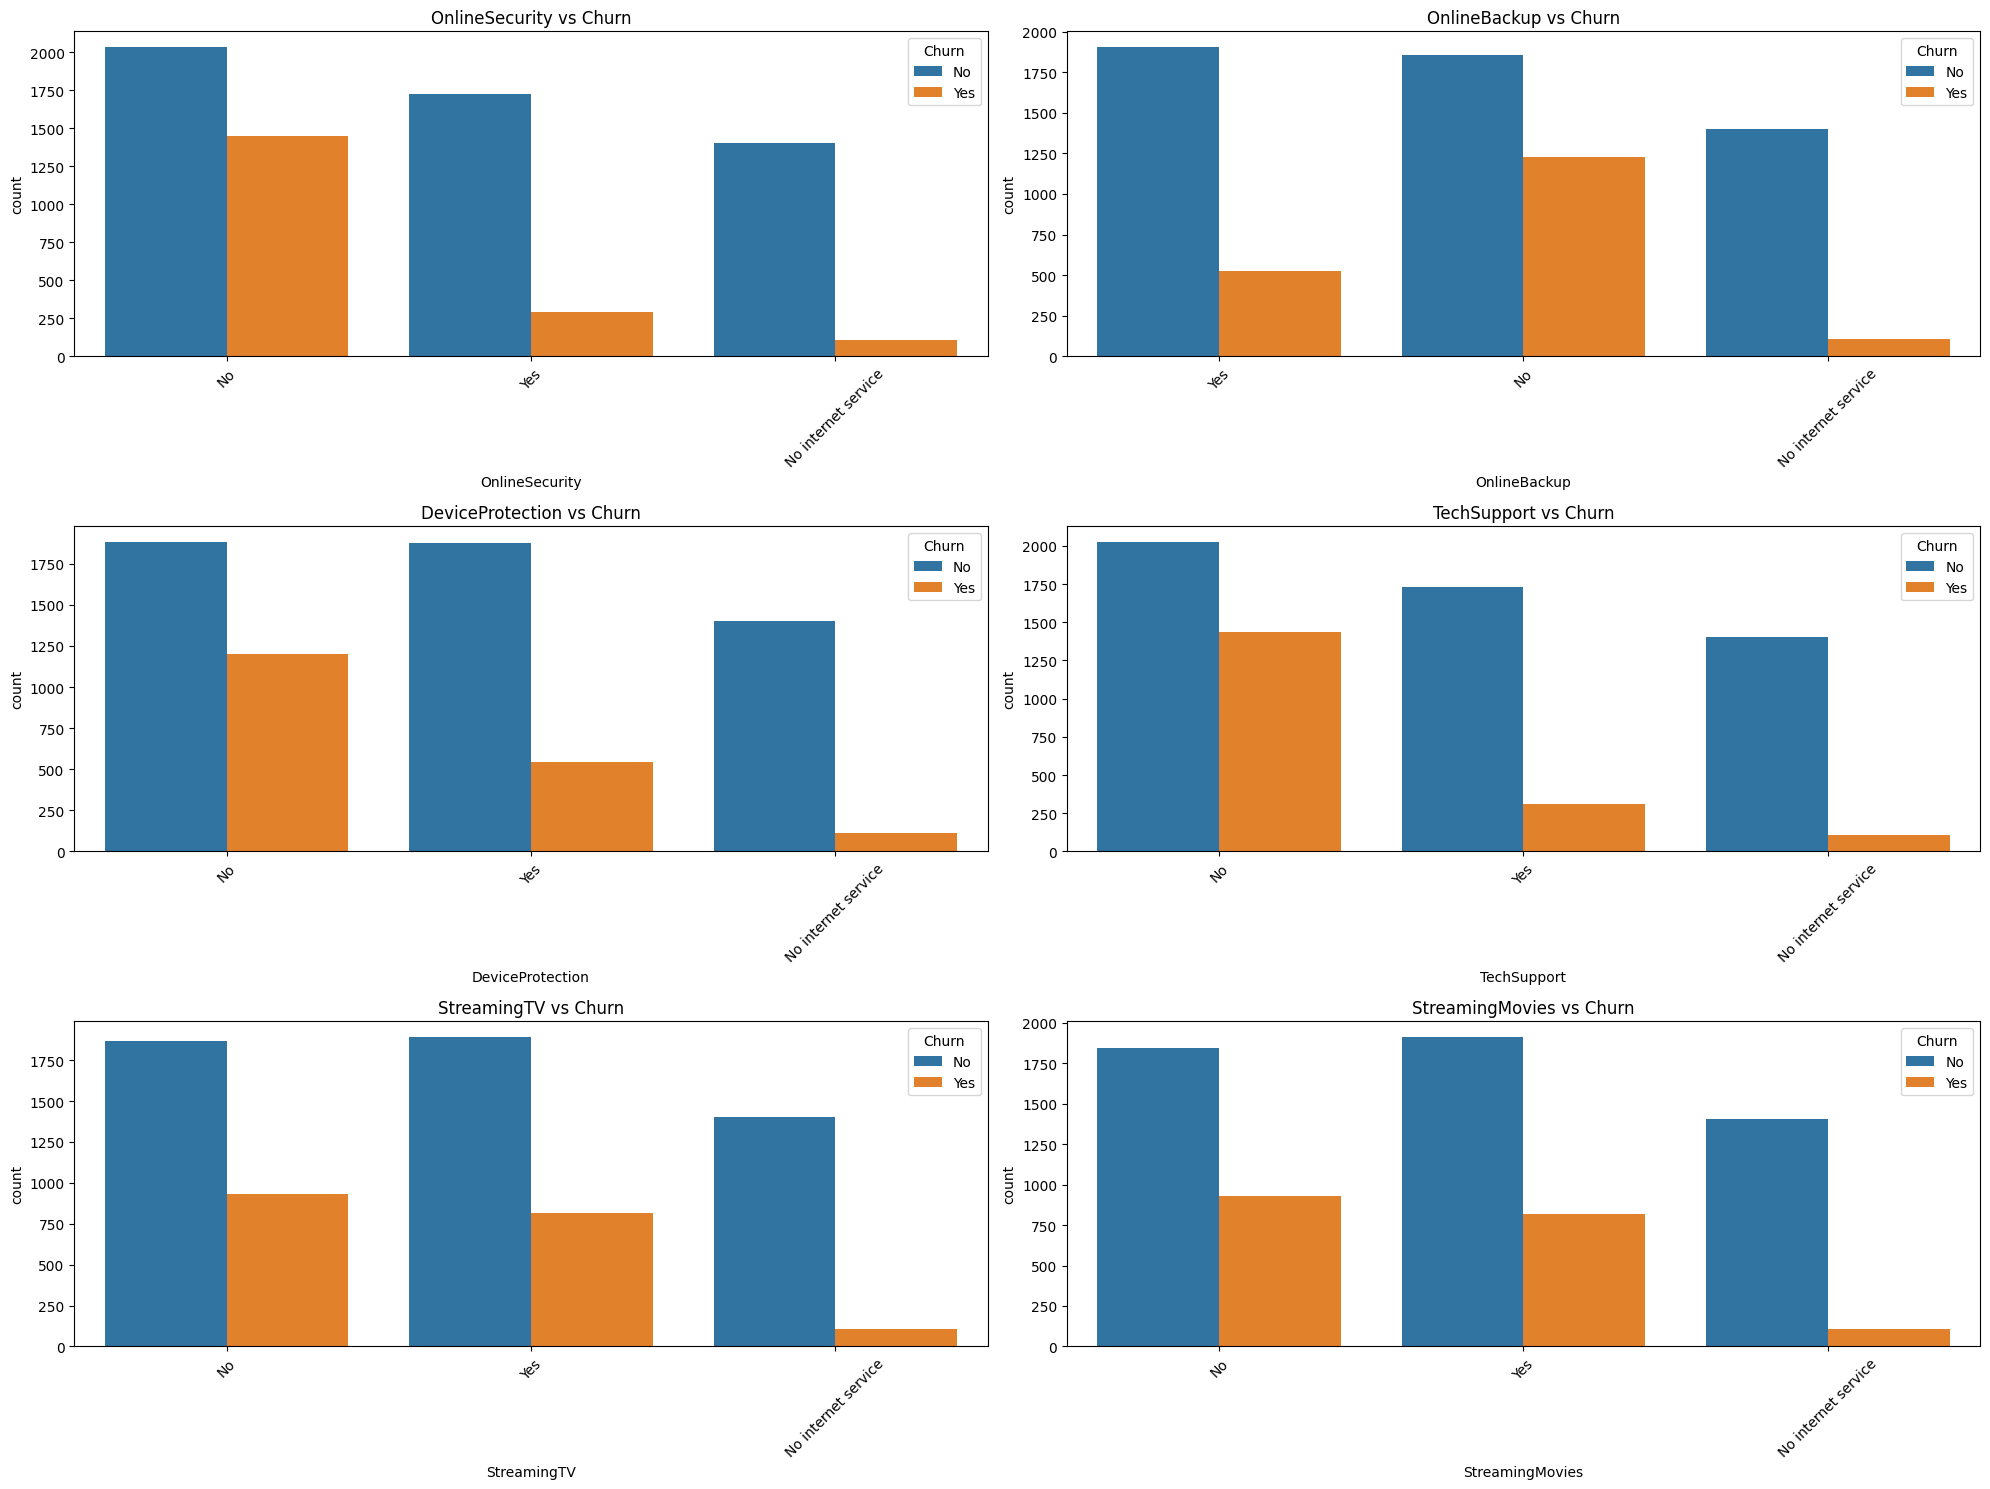

In [52]:
# Additional Services Analysis
additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(20, 15))
for i, service in enumerate(additional_services, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=service, hue='Churn', data=df)
    plt.title(f'{service} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [53]:
from sklearn.preprocessing import LabelEncoder

# Encoder les variables de type object
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Afficher les premières lignes du DataFrame encodé
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,1,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,2,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int64  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int64  
 3   Dependents        7021 non-null   int64  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int64  
 6   MultipleLines     7021 non-null   int64  
 7   InternetService   7021 non-null   int64  
 8   OnlineSecurity    7021 non-null   int64  
 9   OnlineBackup      7021 non-null   int64  
 10  DeviceProtection  7021 non-null   int64  
 11  TechSupport       7021 non-null   int64  
 12  StreamingTV       7021 non-null   int64  
 13  StreamingMovies   7021 non-null   int64  
 14  Contract          7021 non-null   int64  
 15  PaperlessBilling  7021 non-null   int64  
 16  PaymentMethod     7021 non-null   int64  
 17  

In [ ]:
# Selection des caractéristiques et de la cible
X = df.drop(columns=['Churn']) # Variables explicatives
y = df['Churn'] # Variable cible

In [56]:
# Separation des données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% pour l'entraînement et 20% pour le test
# Afficher la taille des ensembles d'entraînement et de test
print(f'Taille de l\'ensemble d\'entraînement : {X_train.shape[0]}')
print(f'Taille de l\'ensemble de test : {X_test.shape[0]}')


Taille de l'ensemble d'entraînement : 5616
Taille de l'ensemble de test : 1405
